In [1]:
#reading files
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
crime= pd.read_csv("../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv")

In [2]:
#renaming columns
crime = crime.rename(columns={'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':'Murder Reason','Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act':'Crime against women(reason)','Number of child victims':'victims (child)','Number of male victims(adult)':'victims(male)','Number of female victims(adult)':'victims(female)','Kidnnaping:\nNumber of child victims':'kidnapping(child)','Number of male(adult) ':'kidnapping(males)','Number of female(adult)':'kidnapping(females)','Number of adult victims':'victims(adult)','yoyo': 'victim(female child)'})

In [3]:
#filling 0 inplace of NaN
crime=crime.fillna(0)

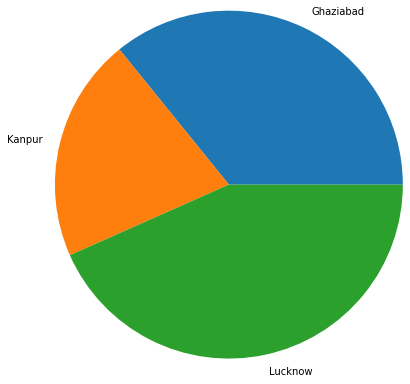

In [4]:
#making graph for the total crimes per city
#crime.groupby(['City ']).count()['count']
city=['Ghaziabad','Kanpur','Lucknow']
crimes=np.array([167, 97,202])
plt.pie(crimes, labels= city, radius=2)
plt.show()

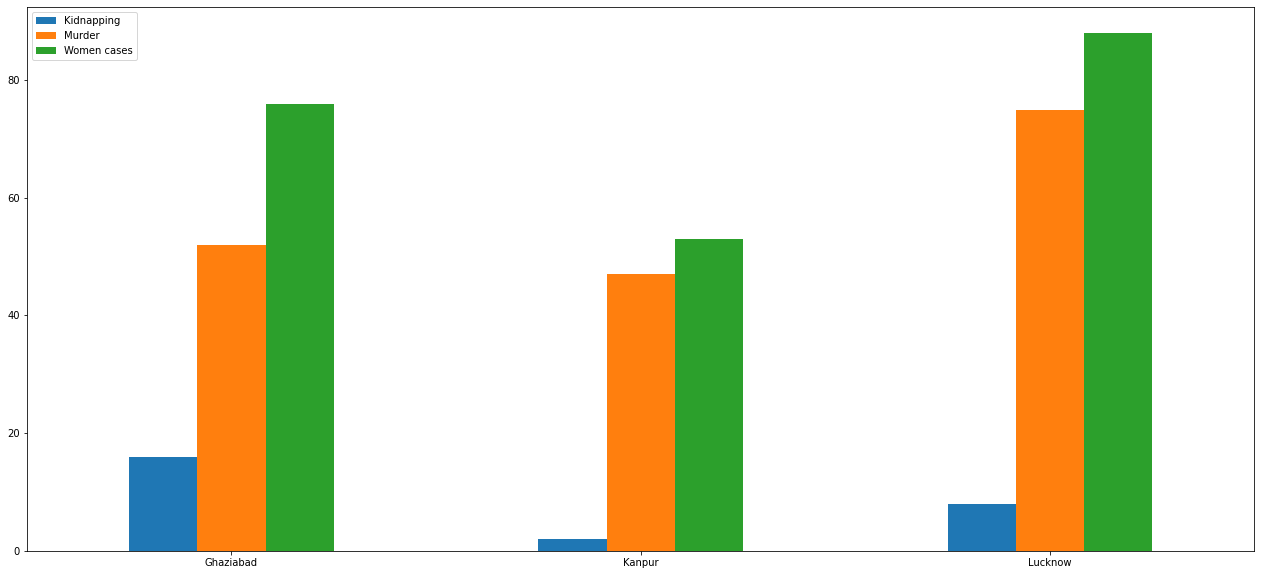

In [5]:
#Graph of city v/s crime type
crime['kidnapping']= crime['kidnapping(child)']+ crime['kidnapping(males)']+ crime['kidnapping(females)']
crime['murder']= crime['victims (child)'] + crime['victims(male)'] + crime['victims(female)']
crime['women case']=crime['victims(adult)']+ crime['Number of childs invoved']
arr=crime.groupby(['City ']).sum().to_numpy()
kid=arr[:,8]
murd=arr[:,9]
wome=arr[:,10]
index=['Ghaziabad', 'Kanpur', 'Lucknow']
df = pd.DataFrame({'Kidnapping': kid, 'Murder': murd, 'Women cases': wome}, index=index)
ax = df.plot.bar(rot=0,figsize=(22,10))

# OBSERVATIONS:
1. Where there is more cases of women crime the murder rate is higher.
2. But the same logic doesn't apply in the case of kidnapping, in case of kidnapping crime against women play a big role.

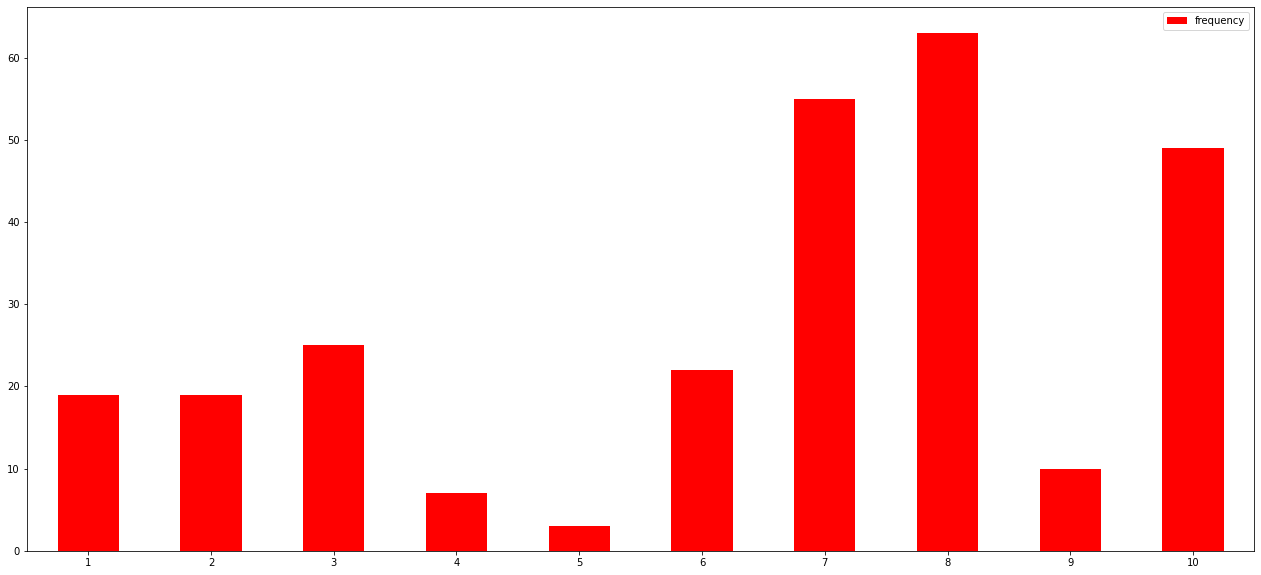

In [6]:
#Plotting graph for the frequency of each crime
# key
# 1. Murder with Rape 
# 2. Dowry Deaths
# 3. Suicide
# 4. Kidnapping
# 5. Acid Attack
# 6. Cruelty by Husband/in-laws
# 7. Rape only
# 8. Assault on Women with Intent to Outrage her Modesty 
# 9. Cyber Crimes against Women
# 10. Protection of Children from Sexual Offences Act(POSCO)
women= crime.loc[crime['Crime against women(reason)']!= 0]
women= women.drop(['Murder Reason','Title', 'Text', 'victims (child)' ,'victims(male)', 'victims(female)', 'kidnapping(child)','kidnapping(males)', 'kidnapping(females)', 'victims(adult)', 'Number of childs invoved', 'kidnapping','murder','women case'], axis= 1)
women= women.rename(columns={'Crime against women(reason)':'1'})
women[2]=0
women[3]=0
for i in range(0,len(women)):
    if "," in str(women.iloc[i,1]):
        cl= women.iloc[i,1].split(',')
        women.iloc[i,1]= int(cl[0])
        women.iloc[i,2]= int(cl[1])
        if len(cl)>2:
            women.iloc[i,3]=int(cl[2])
        elif int(women.iloc[i,1])>100:
            women.iloc[i,2]=int(women.iloc[i,1])%100
            women.iloc[i,1]=int(women.iloc[i,1])//100
col1=women[['1']]
col1= col1.astype(int)
women= women.drop(['1'],axis=1)
women[1]= col1
a= np.array([19,19,25,7,3,22,55,63,10,49])
index=[]
for i in range(1,11):
    index.append(i)
df2=pd.DataFrame({"frequency": a},index= index)
ax1 = df2.plot.bar(rot=0,figsize=(22,10),color='r')

# OBSERVATION:
1. Women crime type 7, 8 and 10 happens very frequently which shows that female child are more prone to suffer where the cases of crime against women are higher

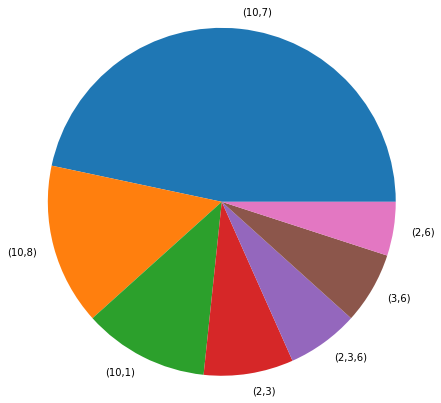

In [7]:
arr=women.to_numpy()
b=np.array([2, 3, 6])
count=0
#counting the frequency of several combinations of crimes
for i in range(0,len(arr)):
    if (arr[i,:]==[10]).any():
        count+=1

index= ['(10,7)','(10,8)','(10,1)','(2,3)','(2,3,6)','(3,6)','(2,6)']
times=np.array([28,9,7,5,4,4,3])
plt.pie(times, labels= index, radius=2)
plt.show()

# OBSERVATIONS
1. "Deaths due to dowry, suicide and cruelty by Husband/in-laws" these three terms appears most of the time with each others suggesting the impact of domestic violence
2. Kidnapping appears about 3 times with murder with rape

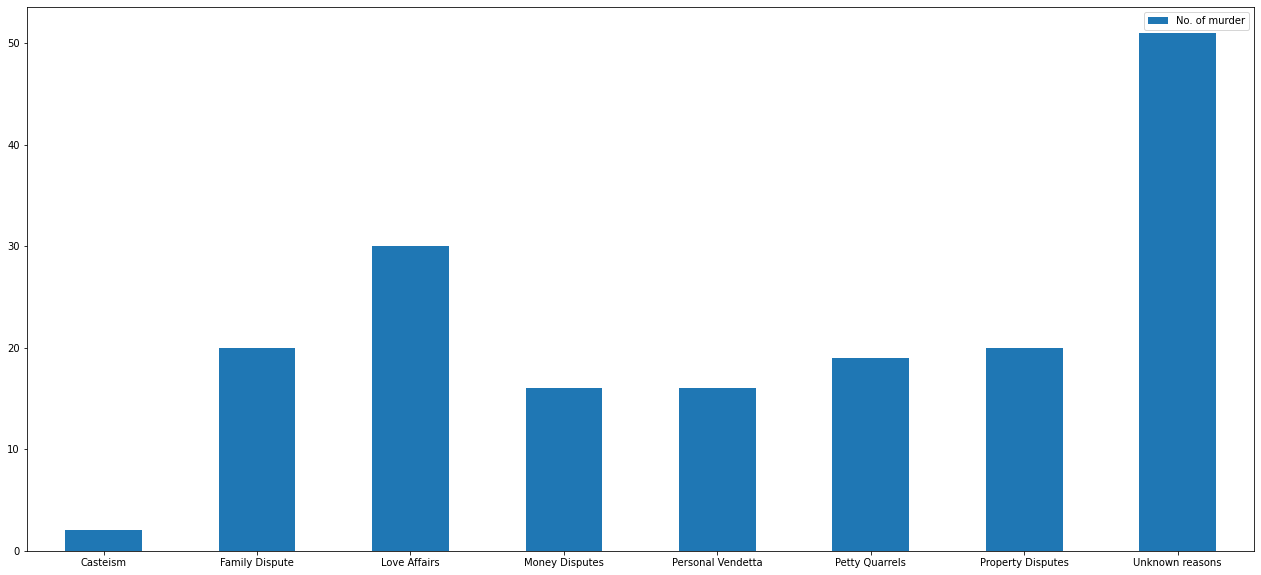

In [8]:
#Statistics for reasons for murder in UP
murder= crime.loc[crime['Murder Reason']!= 0]
murder= murder.drop(['Title', 'Text', 'victims (child)' ,'victims(male)', 'victims(female)', 'kidnapping(child)','kidnapping(males)', 'kidnapping(females)', 'victims(adult)', 'Number of childs invoved', 'Crime against women(reason)','kidnapping', 'women case'], axis= 1)
murder= murder.groupby(['Murder Reason']).sum()
murder=murder.astype(int)
#bar graph for the statistics
index1=['Casteism', 'Family Dispute','Love Affairs','Money Disputes','Personal Vendetta','Petty Quarrels','Property Disputes','Unknown reasons']
arr1=murder.to_numpy()
df1=pd.DataFrame({"No. of murder": arr1[:,0]},index= index1)
ax1 = df1.plot.bar(rot=0,figsize=(22,10))
#Here we observe that "love affairs" are the biggest known reason for murder

# Some ideas related to what can we do with title and text:
1. Can apply a condition to check how frequent some terms like : 'Robbery', 'kill','blackmail', appears 
2. Can break the big data into chunks and find statistics out of it, doing this till found any pattern like group of words which appears together.